# Introduction to NumPy

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vistec-AI/ai-builders/blob/main/notebooks/ai_builder_intro_numpy.ipynb)

### But First, Learning Tips!

1. Before clicking \[ ▶ Run \] to see the result from running the code, **make a guess of what the final result would be** before actually running it.
2. **Do not be afraid to play around with code**: change them, re-run the code, and see if the new result meets your expectation.
3. Got error messages? Relax. Even experienced programmers got these so-called bugs! **Pause for a few seconds and see why the code produces such error.**

## What is NumPy?

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Here is [NumPy Documentation](https://numpy.org/doc/1.20/user/whatisnumpy.html)

## Objective

* Understand the difference between one-, two- and n-dimensional arrays in NumPy.

* Understand how to apply some linear algebra operations to n-dimensional arrays.



## The Basics

NumPy’s main object is the homogeneous multidimensional array. It is **a table of elements** (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called **axes**.

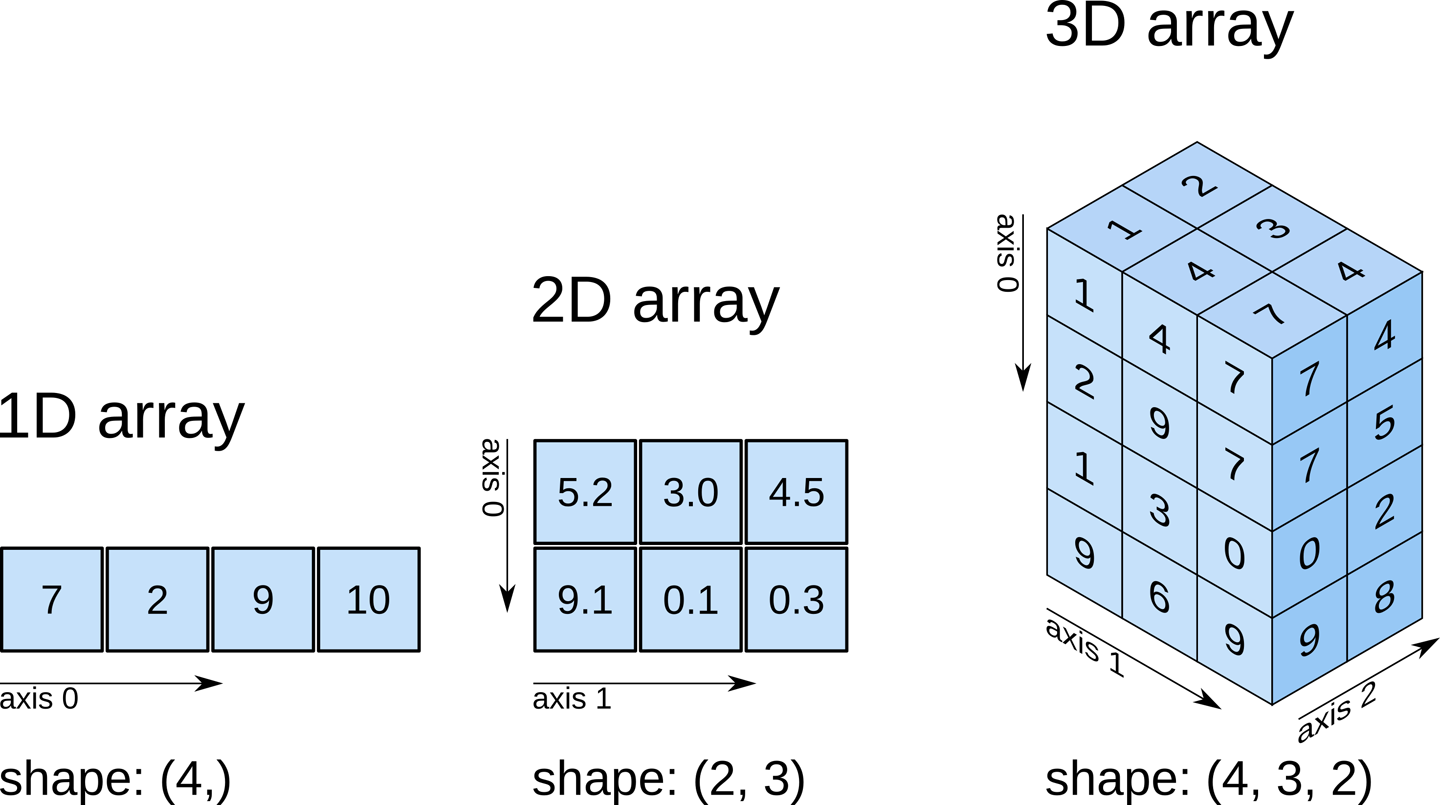


For example, the array 
```
[7, 2, 9, 10] 
```
has one axis. That axis has 4 elements in it, so we say it has a length of 4.

In the example below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.

```
[[ 5.2, 3.0, 4.5],
 [ 9.1, 0.1, 0.3]]
 ```



## Installing NumPy

Installing package: [NumPy](https://numpy.org/install/) 

In [ ]:
# This tells Colab to install a package from
!pip install numpy

## Array Creation

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [ ]:
import numpy as np

a = np.array([7,2,9,10])

In [ ]:
a

In [ ]:
print(a)

In [ ]:
print(a.dtype)

In [ ]:
b = np.array([1.2, 3.5, 5.1])

print(b)

print(b.dtype)

In [ ]:
c = np.array([1,2,3,4.5])

print(c.dtype)

A frequent error consists in calling array with multiple arguments, rather than providing a single sequence as an argument.

np.array(**sequence of numbers**)

In [ ]:
a = np.array(1,2,3,4)    # WRONG

In [ ]:
a = np.array([1,2,3,4])  # RIGHT

array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [ ]:
# 1st sequence -> [1,2,3,5]
# 2nd sequence -> [4,5,6,7]
# 3rd sequence -> [4,5,2,1] 

b = np.array([[1,2,3,5], [4,5,6,7], [4,5,2,1]])

print(b)

In [ ]:
b.shape

In [ ]:
# 1st sequence of sequences -> [[1,2,3,5], [4,5,6,7], [4,5,2,1]]
# 2nd sequence of sequences -> [[3,4,6,8], [7,8,9,10], [3,5,7,10]]

c = np.array([[[1,2,3,5], [4,5,6,7], [4,5,2,1]],
             [[3,4,6,8], [7,8,9,10], [3,5,7,10]]])

print(c)

In [ ]:
c.shape

In [ ]:
d = np.zeros((3, 4)) # create zeros matrix with (3,4) shape.

print(d)

In [ ]:
e = np.ones((2,3), dtype=int) # create ones matrix with (2,3) shape.

print(e)

In [ ]:
f = np.ones((2,3), dtype=float) # create ones matrix with (2,3) shape.

print(f)


In [ ]:
g = np.random.random((3,3)) # create random matrix with (3, 3) shape.

print(g)

## Basic Operations

Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [ ]:
a = np.array([2, 40, 73, 87])

b = np.array([1, 20, 20, 50])

c = a - b

print(c)

In [ ]:
d = a ** 2

print(d)

In [ ]:
e = np.array([0, np.pi, 2*np.pi])

f = np.cos(e)

print(f)

In [ ]:
g = np.array([10, 20 ,30 ,40])

h = g < 30

print(h)

Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the @ operator (in python >=3.5) or the dot function or method:



In [ ]:
A = np.array([[1, 1], [0, 1]])

B = np.array([[2, 0], [3, 4]])

elementwise_product = A*B # elementwise product

print(elementwise_product)

Let's try this!

http://matrixmultiplication.xyz/

In [ ]:
matrix_product = A@B # matrix product

print(matrix_product)


In [ ]:
another_matrix_product = A.dot(B) # another matrix product

print(another_matrix_product)

In [ ]:
matrix = np.array([[[1,2,3,5], [4,5,6,7], [4,5,2,1]],
             [[3,4,6,8], [7,8,9,10], [3,5,7,10]]])

print(matrix)

print(matrix.sum())

print(matrix.min())

print(matrix.max())


In [ ]:
a = np.arange(4)

print(a)

In [ ]:
b = np.arange( 0.0, 3.5, 0.3 ) # create matrix that has values from 0.0 to 2.1 increasing by 0.3 each

print(b)

print(b.shape)

In [ ]:
c = b.reshape(3,4)

print(c)

In [ ]:
print(c.sum(axis=0)) #sum of each coloumn

In [ ]:
print(c.min(axis=1)) #min of each row

In [ ]:
d = np.exp(c) #apply exponential function to the matrix

print(d)

In [ ]:
e = np.sqrt(c) #apply square root function to the matrix

print(e)

## Indexing, Slicing and Iterating

One-dimensional arrays can be indexed, sliced and iterated over, much like lists and other Python sequences.

In [ ]:
a = np.arange(10)**3

print(a)

In [ ]:
a[2]

In [ ]:
a[2:5]

In [ ]:
a[ : :-1]

Multi dimentional array.

In [ ]:
A = np.array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

print(A)

In [ ]:
A[2,3]

In [ ]:
A[0:5, 1] # each row in the second column of A

In [ ]:
A[ : ,1] # equivalent to the previous example

In [ ]:
A[1:3, : ] # each column in the second and third row of b

In [ ]:
A[-1] # the last row. Equivalent to A[-1,:]

## Linear Algebra

Work in progress. Basic linear algebra to be included here.

### Simple Array Operations
See linalg.py in numpy folder for more.

In [ ]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])

print(a)

In [ ]:
a.transpose()

In [ ]:
np.linalg.inv(a)

## Problems

A three-dimensional RGB matrix. Each layer of the matrix is a two- dimensional matrix of red, green or blue pixel values. 

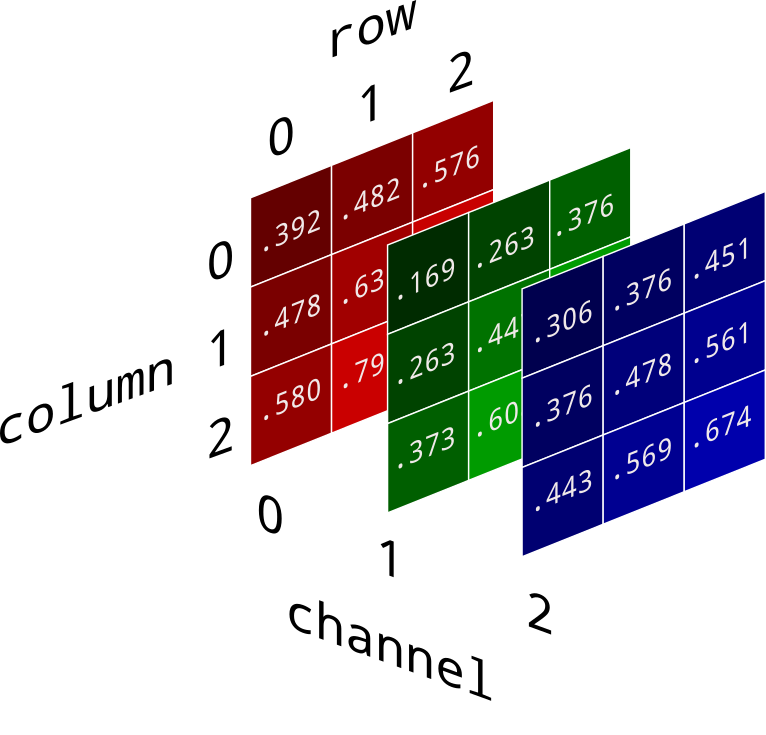

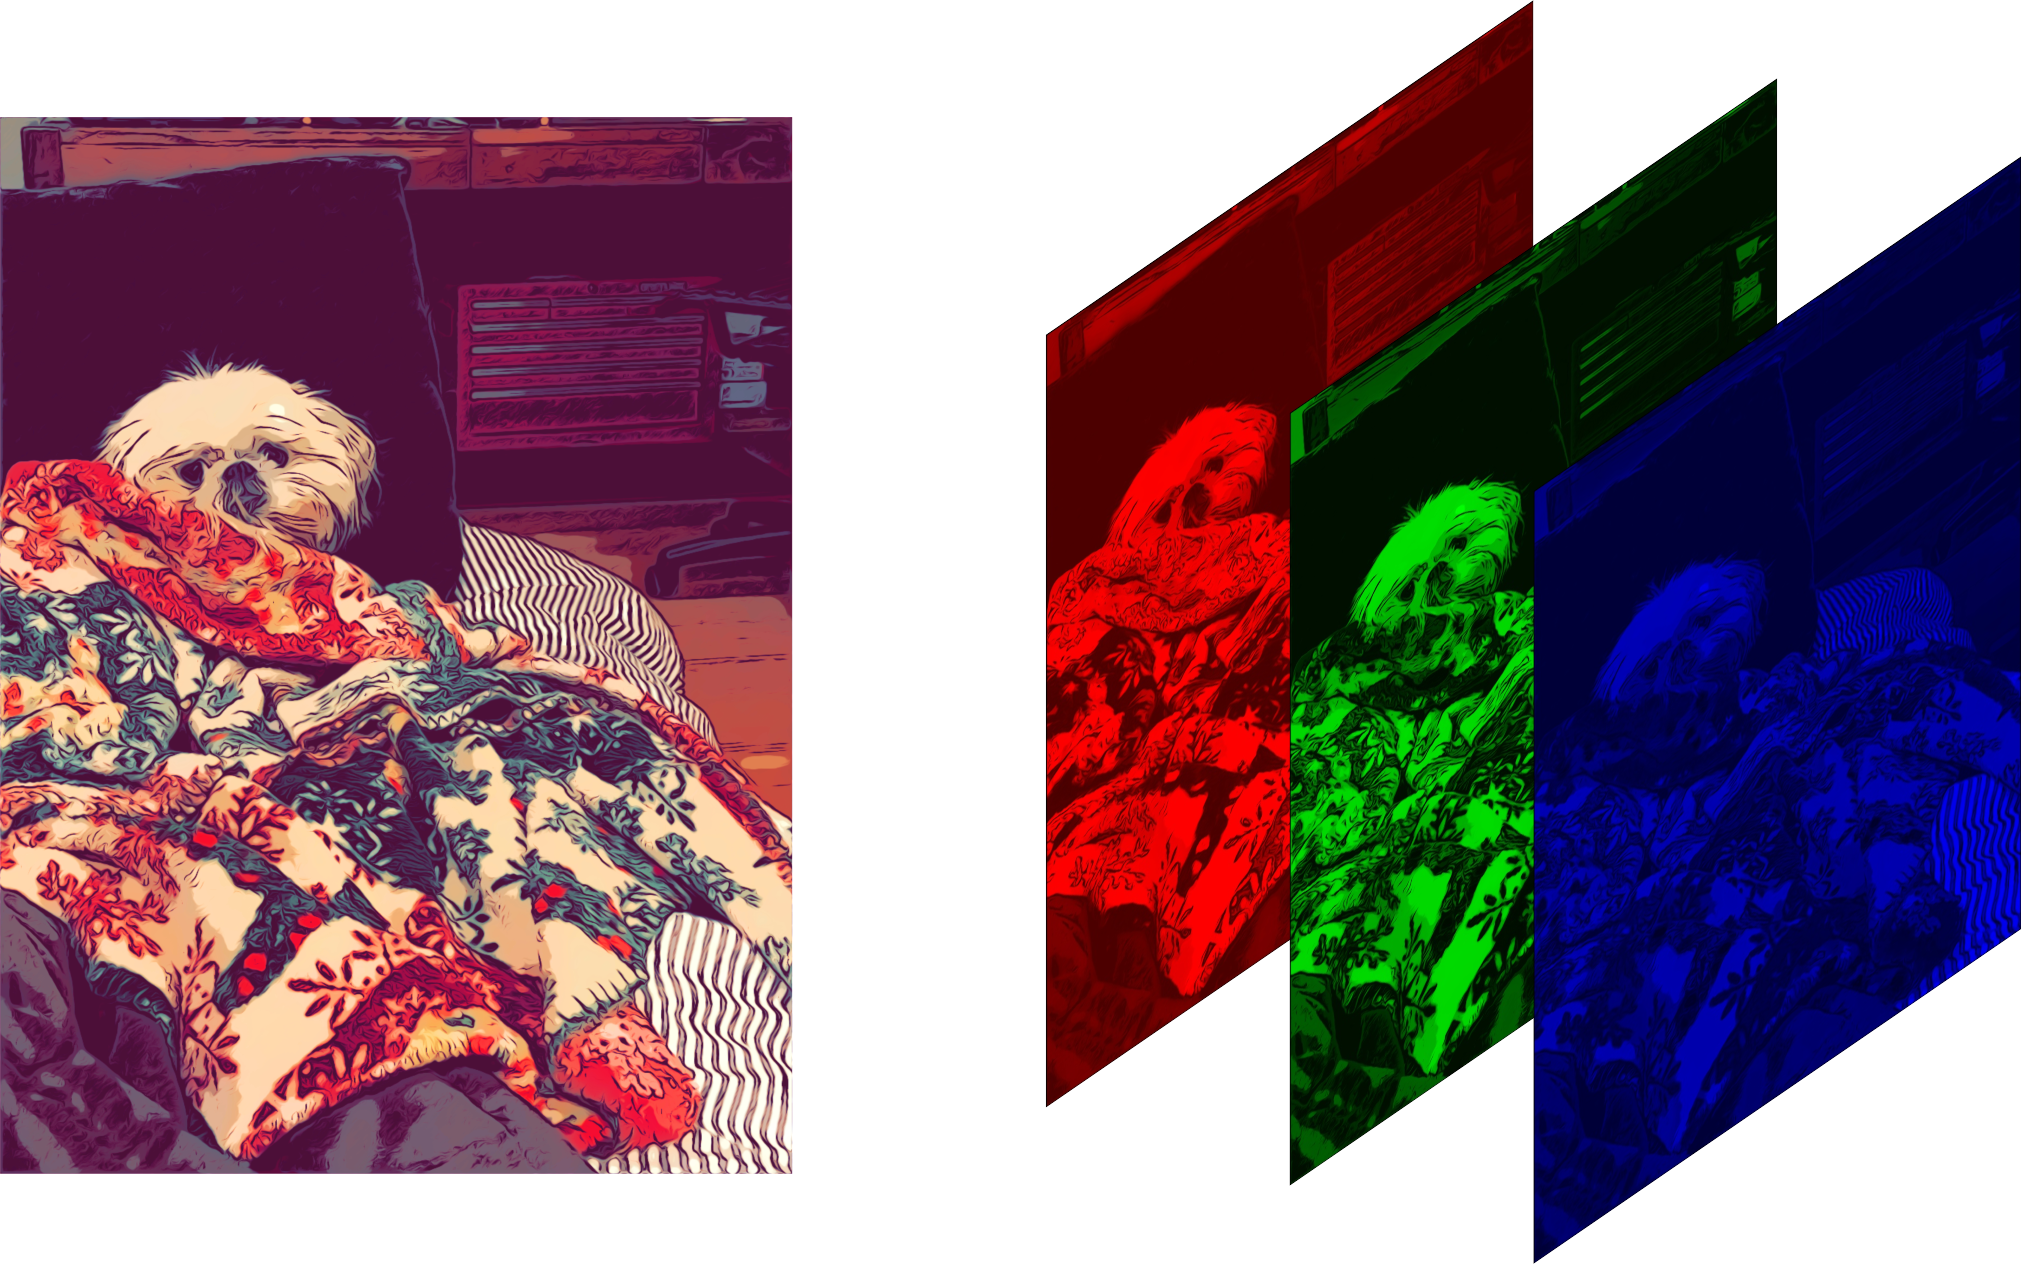

Image credit: Diane Rohrer


In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image

AI builder image

https://scontent.fbkk2-6.fna.fbcdn.net/v/t1.6435-9/161424913_107223454779436_1808807435807035185_n.png?_nc_cat=109&ccb=1-3&_nc_sid=09cbfe&_nc_ohc=AL7xWwME7NMAX_No7PE&_nc_ht=scontent.fbkk2-6.fna&oh=03044b5171f80c735011407d0ead6c33&oe=608DBC47

In [ ]:
img = Image.open('ai.png')

display(img)

In [ ]:
img_array = np.array(img)

print(img_array)

In [ ]:
print(img_array.shape)

In [ ]:
display(Image.fromarray(img_array, "RGB"))

In [ ]:
rotate_img = np.rot90(img_array, axes=(0,1))

In [ ]:
rotate_img.shape

In [ ]:
display(Image.fromarray(rotate_img, "RGB"))